### Diabetes predictive model
by : omar marey

using diabetes data from kaggle i will create predictive ML model 

### Importing libraries and Data


---



*   first i import libraries
*   importing data from my google drive (data is available in kaggle)



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
        


In [1]:
# link of the data
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
from google.colab import files

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! ls

drive  sample_data


In [ ]:
diabetes_data = pd.read_csv('drive/MyDrive/Colab Notebooks/diabetes.csv')

### Exploratory data analysis
* after inspecting the dataframe it appears that some feature contains alot of zero values which medically impossible like BloodPressure and SkinThickness  and Glucose and BMI

* it must be that the data collector put zeros instead of null for missing values

* i used pairplot to get quick glance of data distribution and relation between different features

In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print('number of insulin rows with zero values: ',diabetes_data[diabetes_data.Insulin==0].Insulin.count())
print('number of skin thickness rows with zero values: ',diabetes_data[diabetes_data.SkinThickness==0].SkinThickness.count())
print('number of BMI rows with zero values: ',diabetes_data[diabetes_data.BMI==0].BMI.count())

number of insulin rows with zero values:  374
number of skin thickness rows with zero values:  227
number of BMI rows with zero values:  11


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f492bfb4910>,
      dtype=object)

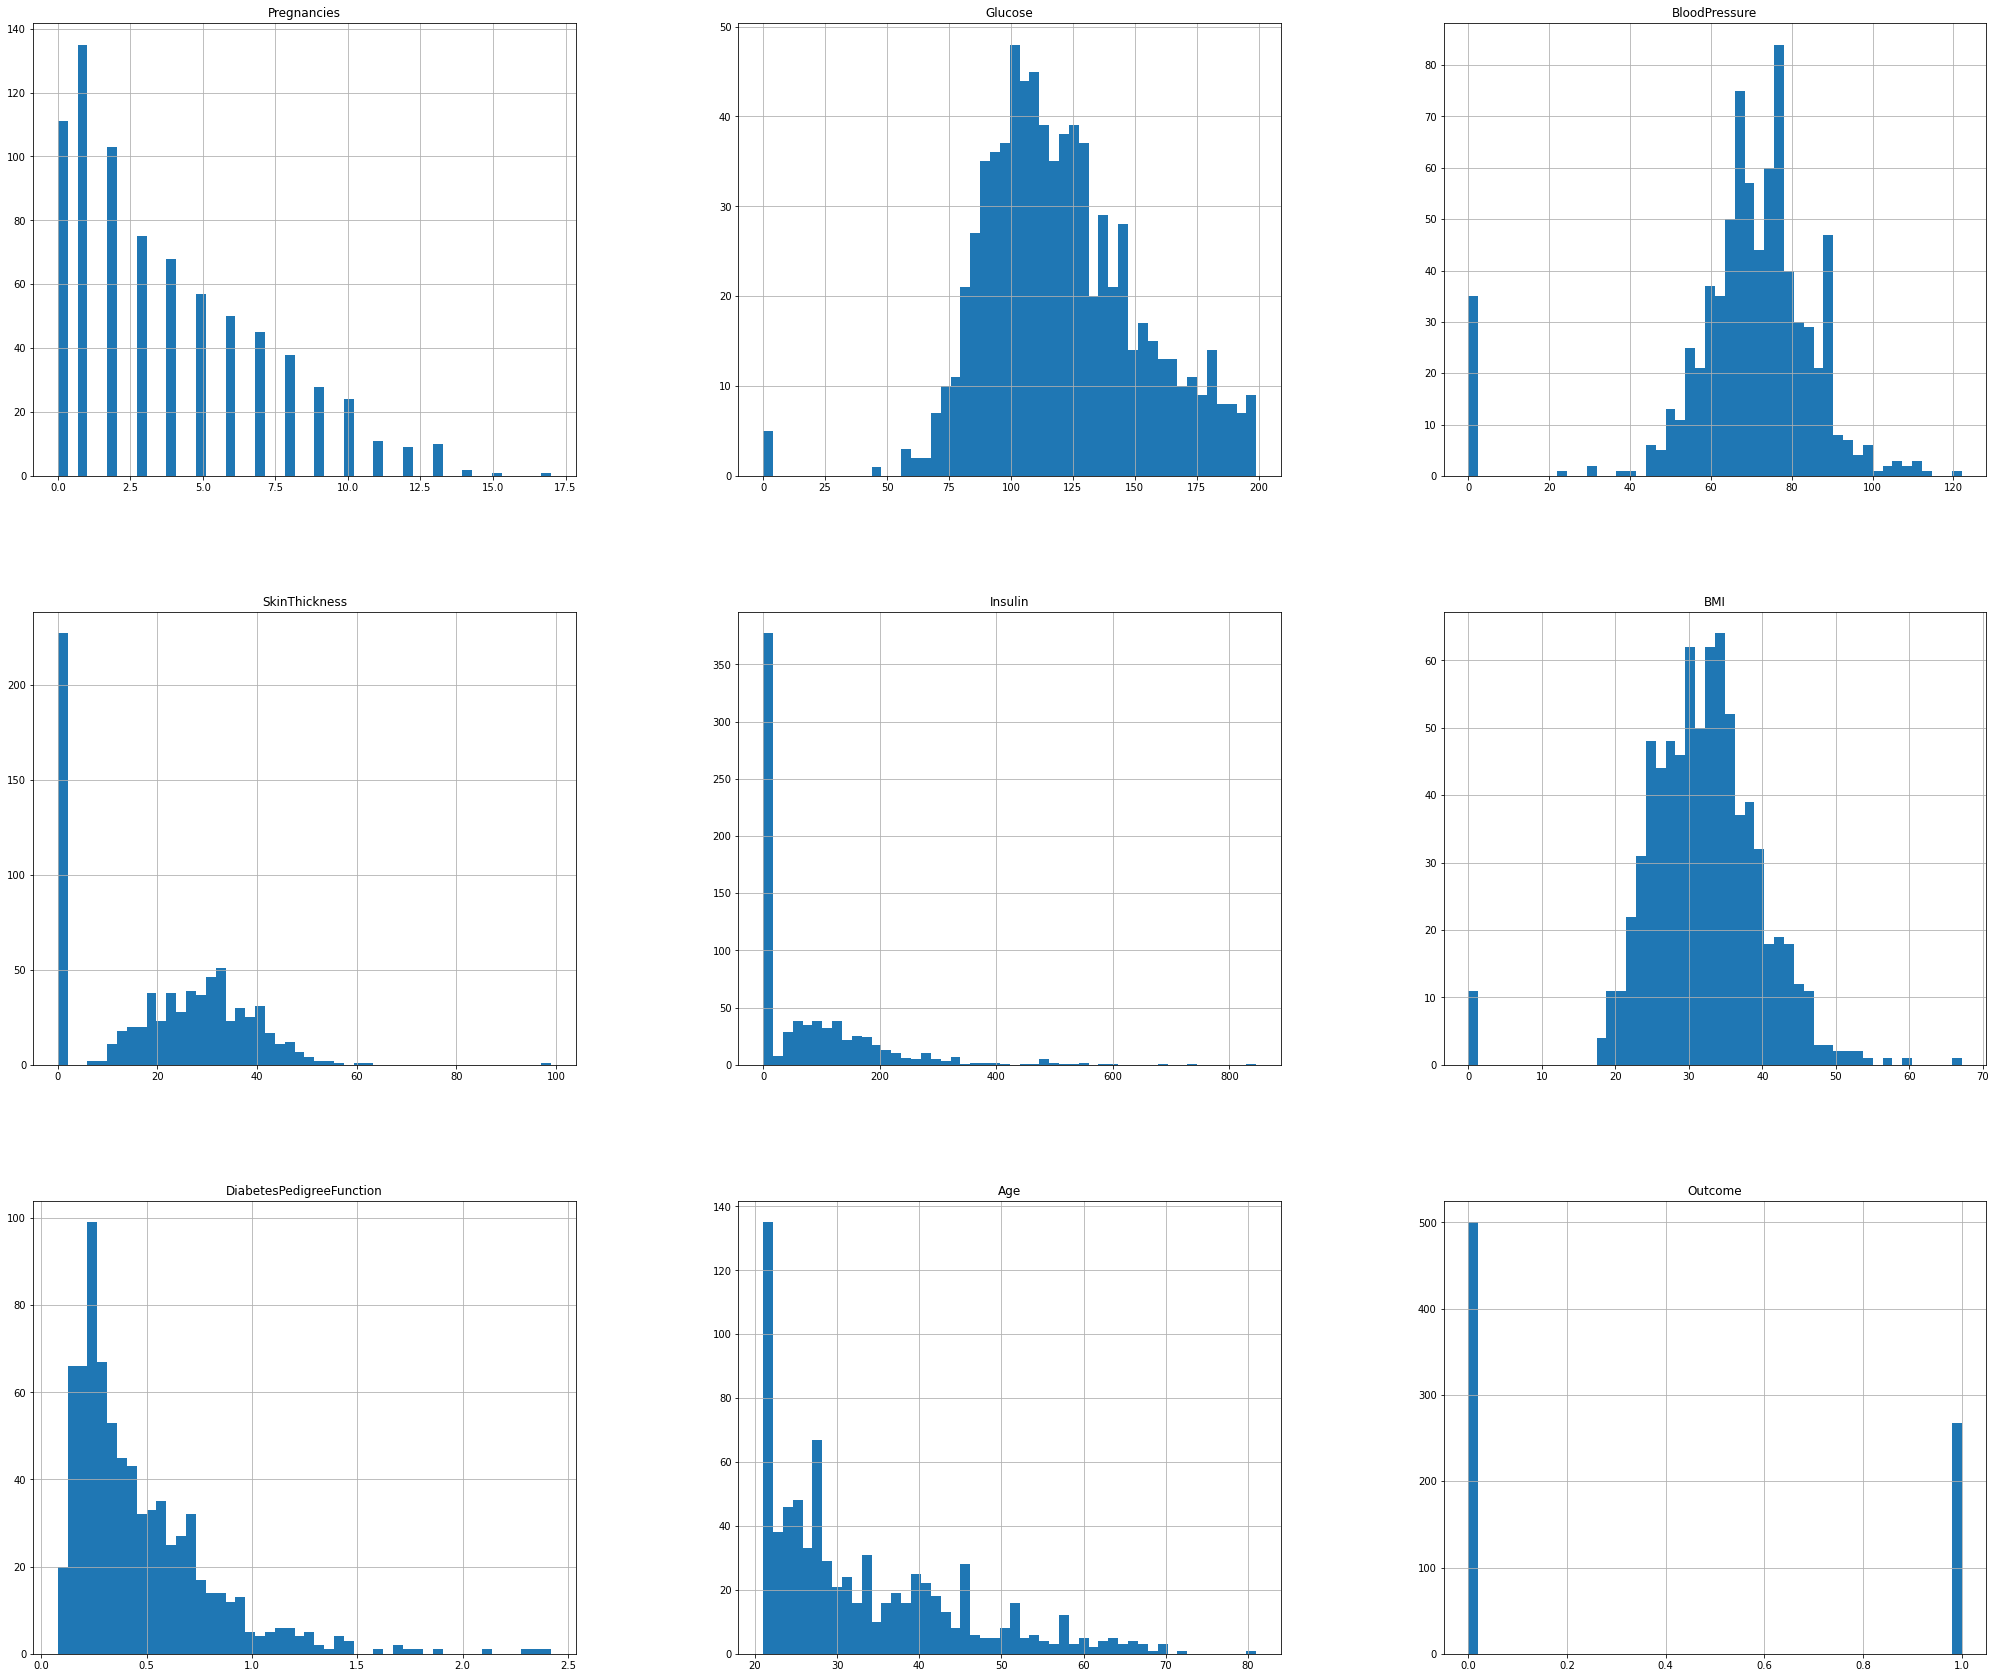

In [ ]:
diabetes_data.hist(bins=50,figsize=(35,30))

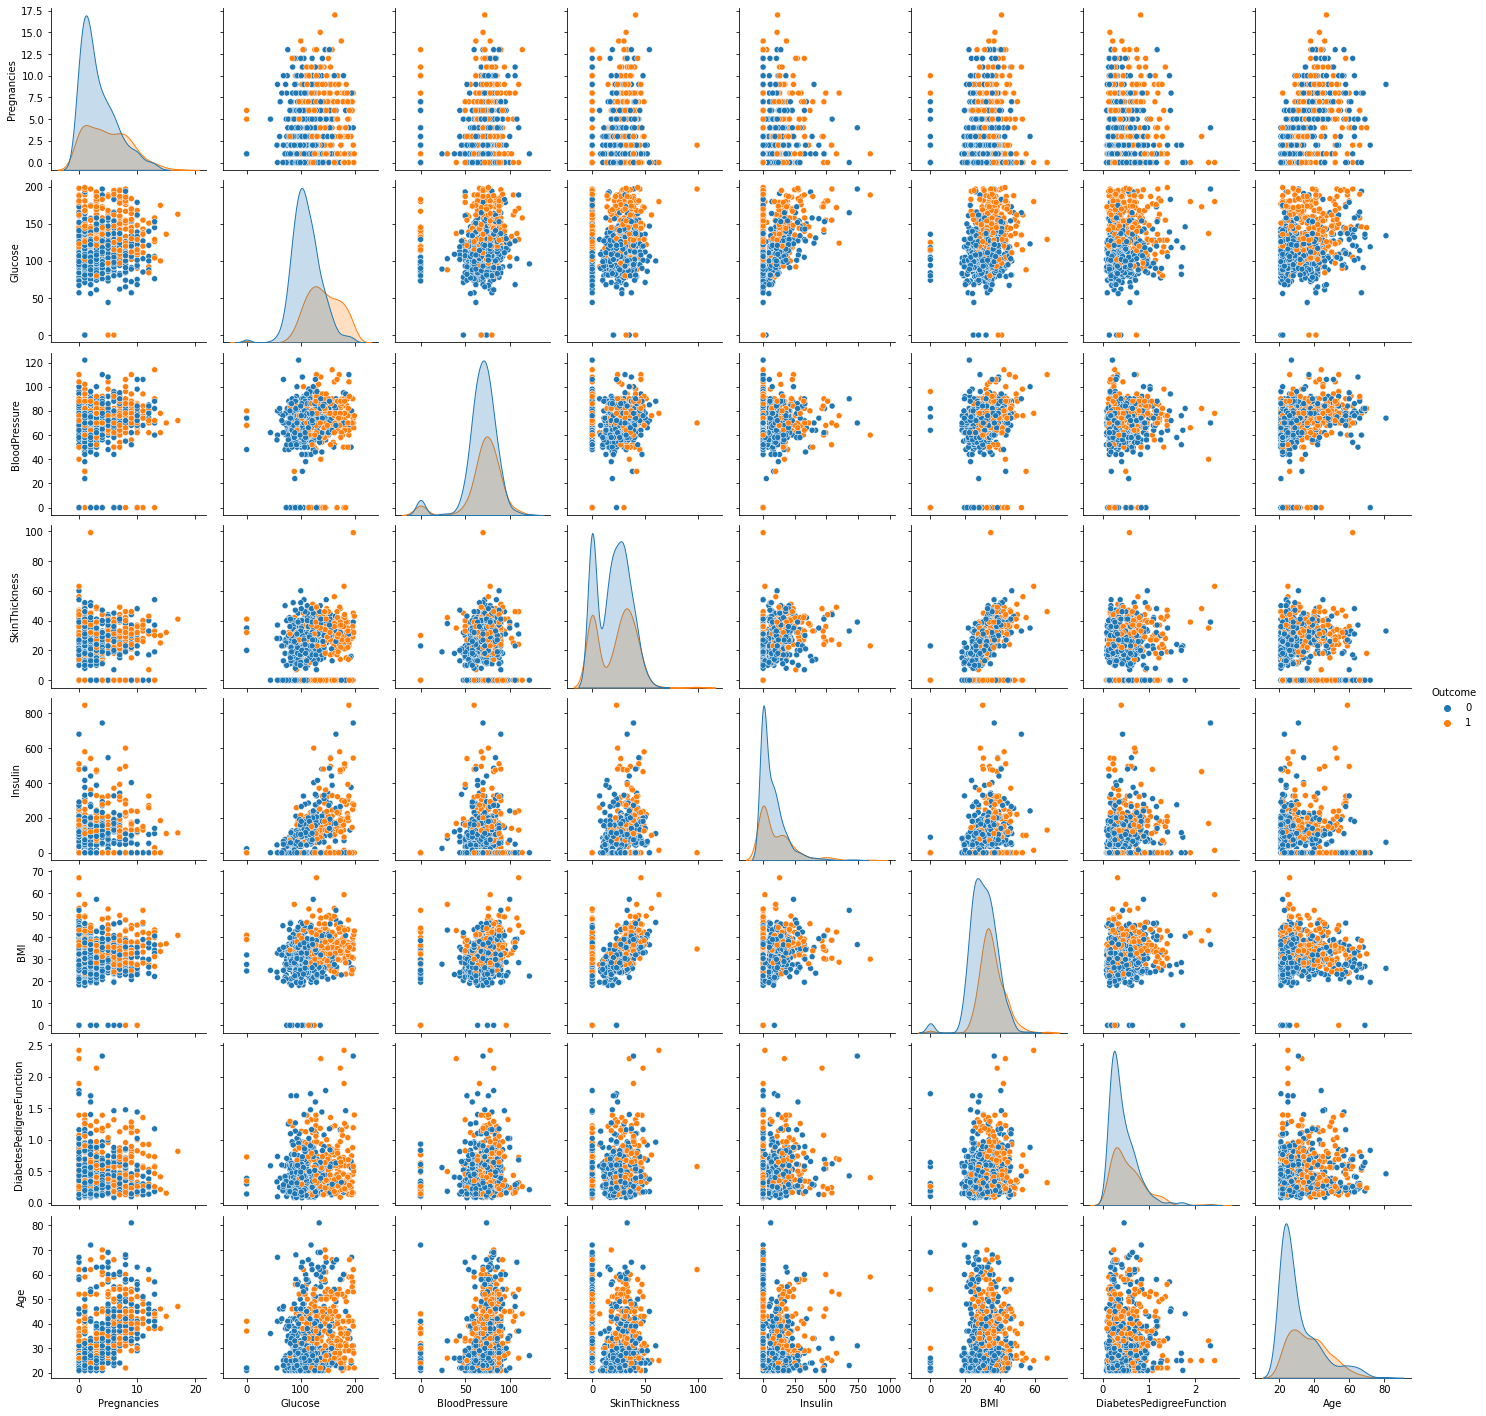

In [ ]:
import seaborn as sns

sns.pairplot(diabetes_data,hue='Outcome')


## Data cleaning 
here i remove the rows that contains zero as having zero blood pressure or insulin or bmi is clearly error they might used zeros instead of null  

In [ ]:
diabetes_full = diabetes_data[(diabetes_data.Insulin>0) & (diabetes_data.BMI >0)& (diabetes_data.BloodPressure >0) & (diabetes_data.SkinThickness >0) & (diabetes_data.Glucose > 0)]
# zero_cols = ['Insulin','BMI','BloodPressure','SkinThickness','Glucose']
# diabetes_full = diabetes_data.copy()
# diabetes_full[zero_cols] = diabetes_full[zero_cols].replace({0:np.nan})
# diabetes_full.isna().sum()

In [ ]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.ensemble import RandomForestRegressor

# knnimp = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
# diabetes_full = pd.DataFrame(knnimp.fit_transform(diabetes_full),columns=diabetes_data.columns)
# diabetes_full

In [ ]:
#! pip install featuretools

In [ ]:

# import featuretools as ft

# dft = ft.EntitySet(id='diabete',dataframes={'diabetes':(diabetes_full,'index')})
# dft= dft.entity_from_dataframe(entity_id = 'diabetes',dataframe=diabetes_data)
# features, feature_names = ft.dfs(entityset=dft,max_depth=2,target_dataframe_name='diabetes')
# features

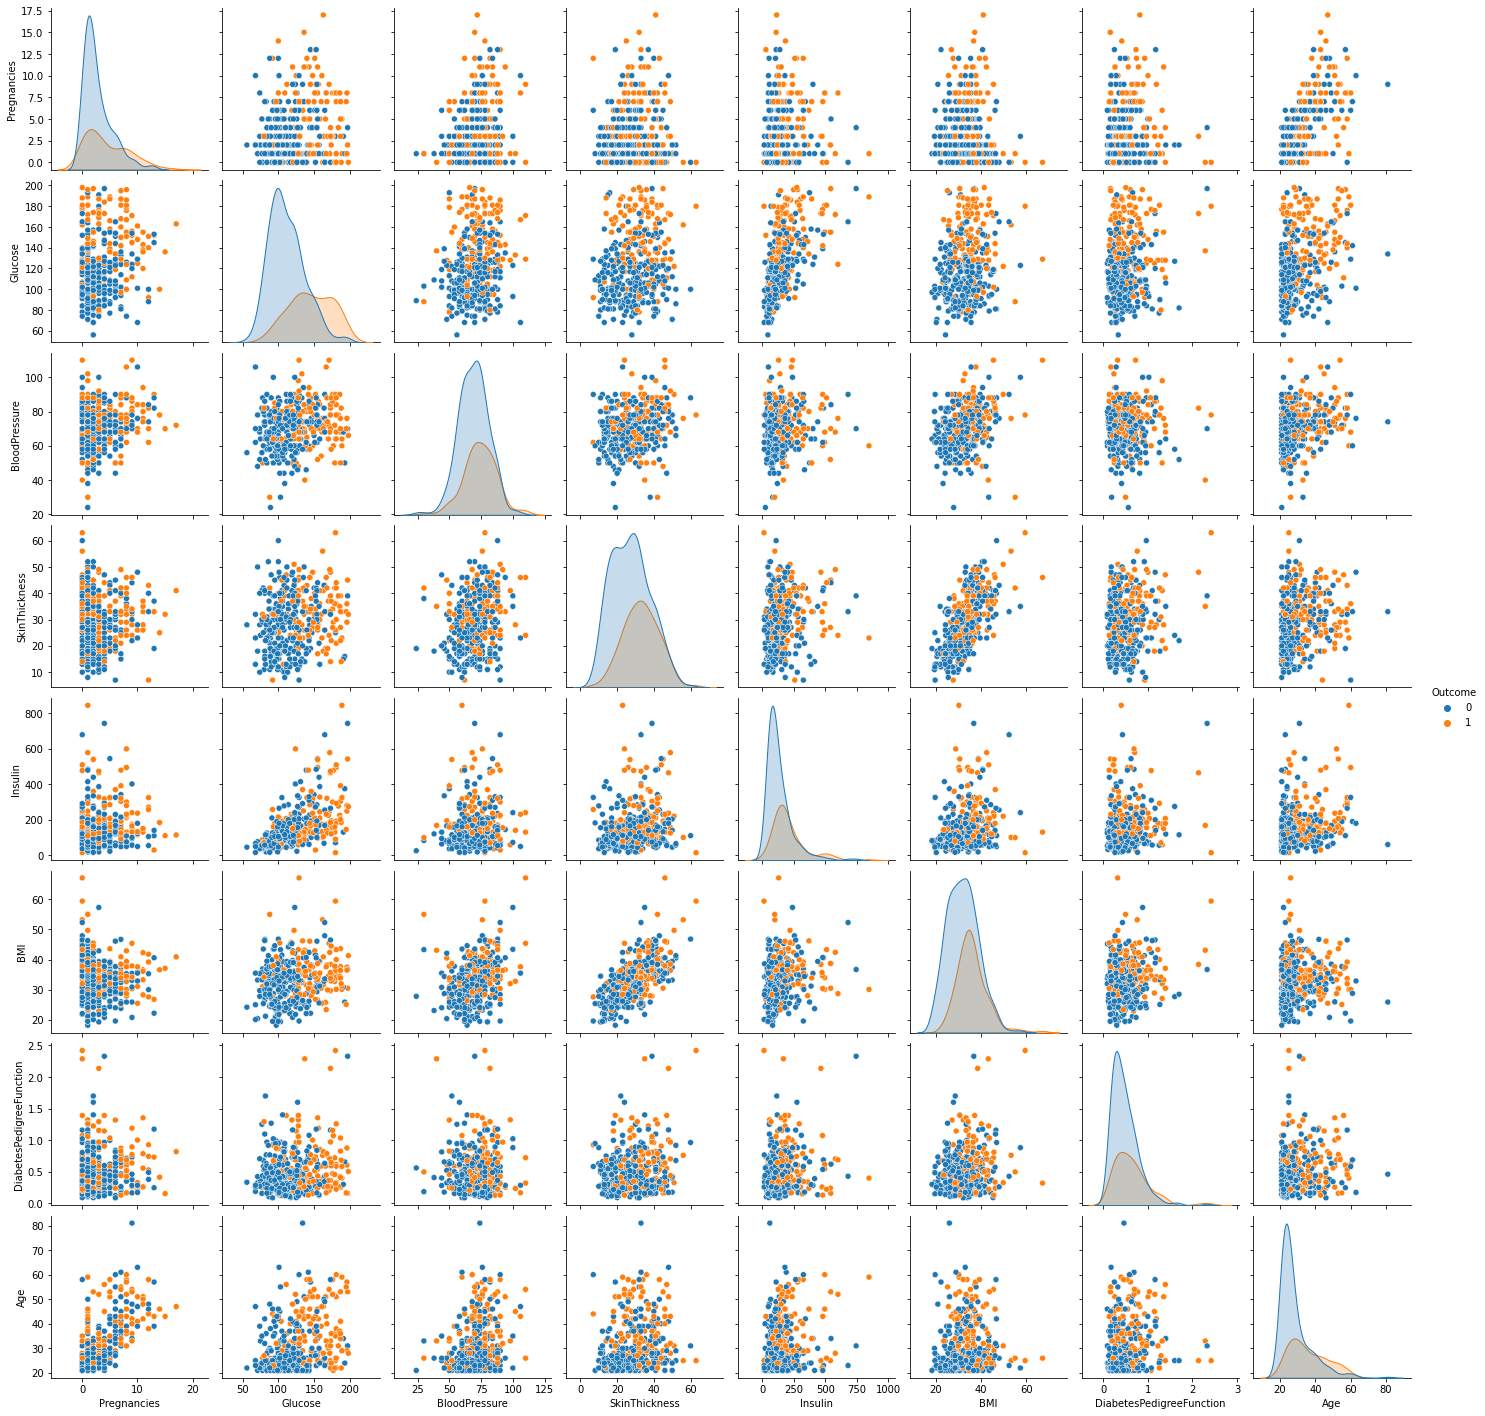

In [ ]:
sns.pairplot(diabetes_full,hue='Outcome')


## Feature engineering 


---



*   substracting the mean from the column and store them in new columns
*   creating new feature by dividing some of the related feature and 
calculating homa_ir which indicator fo the insulin resistance




In [ ]:
mean_def = diabetes_full - diabetes_full.mean()
mean_def.drop(columns=['Outcome'],inplace=True)
mean_def.columns= ['preg-m','glu-m','bp-m','st-m','ins-m','bmi-m','dpf-m','age-m']
diabetes_full = pd.concat([diabetes_full,mean_def],axis=1)
diabetes_full.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,preg-m,glu-m,bp-m,st-m,ins-m,bmi-m,dpf-m,age-m
3,1,89,66,23,94,28.1,0.167,21,0,-2.30102,-33.627551,-4.663265,-6.145408,-62.056122,-4.986224,-0.356046,-9.864796
4,0,137,40,35,168,43.1,2.288,33,1,-3.30102,14.372449,-30.663265,5.854592,11.943878,10.013776,1.764954,2.135204
6,3,78,50,32,88,31.0,0.248,26,1,-0.30102,-44.627551,-20.663265,2.854592,-68.056122,-2.086224,-0.275046,-4.864796
8,2,197,70,45,543,30.5,0.158,53,1,-1.30102,74.372449,-0.663265,15.854592,386.943878,-2.586224,-0.365046,22.135204
13,1,189,60,23,846,30.1,0.398,59,1,-2.30102,66.372449,-10.663265,-6.145408,689.943878,-2.986224,-0.125046,28.135204


In [ ]:
diabetes_full['glu/insulin'] = diabetes_full.Glucose/diabetes_full.Insulin
diabetes_full['BMI/Skinthicknes']= diabetes_full.BMI / diabetes_full.SkinThickness
diabetes_full['HOMA_ir']= (diabetes_full.Glucose *diabetes_full.Insulin) / 4050
diabetes_full['bp/age'] = diabetes_full.BloodPressure / diabetes_full.Age


### ploting the correlation between features and calculate summary statistics for the clean data frame

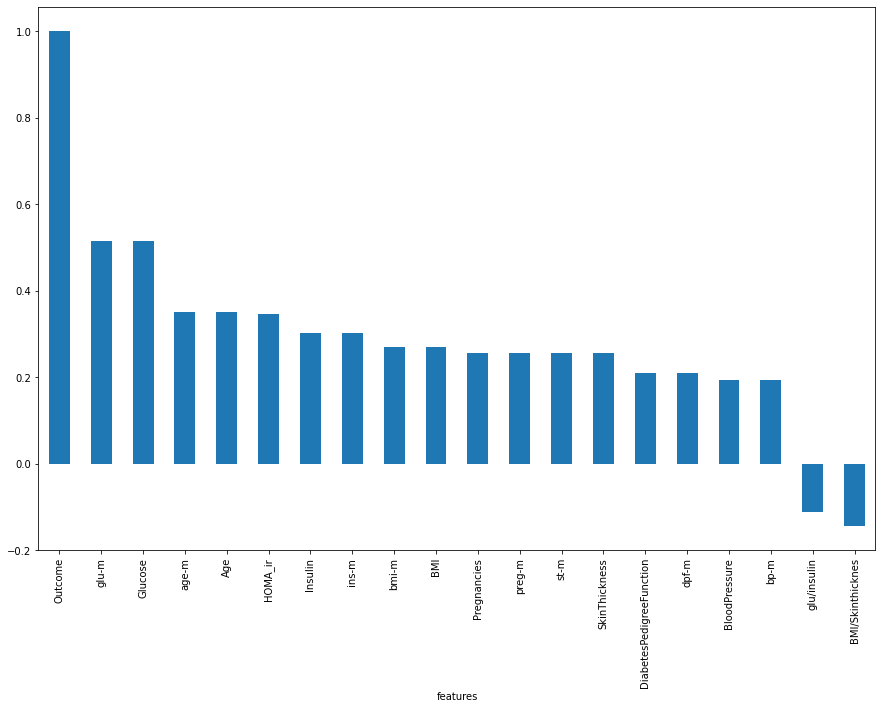

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sorted_corr =pd.DataFrame(sorted(diabetes_full.corr()[:-1].Outcome.items(),key=lambda x:x[1],reverse=True))
sorted_corr.columns=['features','correlation']
sorted_corr.set_index('features',inplace=True)
sorted_corr.plot(kind='bar',legend=False,figsize=(15,10))

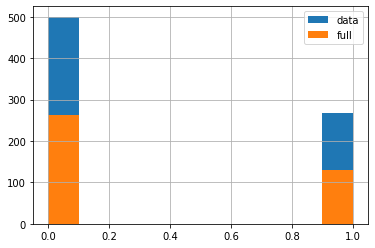

In [ ]:
diabetes_data.Outcome.hist(label='data')

diabetes_full.Outcome.hist(label='full')
plt.legend()

In [ ]:
diabetes_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
 9   preg-m                    392 non-null    float64
 10  glu-m                     392 non-null    float64
 11  bp-m                      392 non-null    float64
 12  st-m                      392 non-null    float64
 13  ins-m                     392 non-null    float64
 14  bmi-m     

In [ ]:
diabetes_full.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,preg-m,...,bp-m,st-m,ins-m,bmi-m,dpf-m,age-m,glu/insulin,BMI/Skinthicknes,HOMA_ir,bp/age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,3.920000e+02,...,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633,-4.531523e-16,...,-6.561645e-15,2.709850e-15,3.610717e-14,2.238572e-14,-3.220213e-16,-7.250436e-16,1.155491,1.255307,5.250125,2.456559
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401,3.211424e+00,...,1.249609e+01,1.051642e+01,1.188417e+02,7.027659e+00,3.454880e-01,1.020078e+01,0.951755,0.433704,5.184815,0.680689
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000,-3.301020e+00,...,-4.666327e+01,-2.214541e+01,-1.420561e+02,-1.488622e+01,-4.380459e-01,-9.864796e+00,0.206667,0.622857,0.251852,0.909091
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000,-2.301020e+00,...,-8.663265e+00,-8.145408e+00,-7.930612e+01,-4.686224e+00,-2.532959e-01,-7.864796e+00,0.669831,0.965625,1.996296,1.947013
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000,-1.301020e+00,...,-6.632653e-01,-1.454082e-01,-3.055612e+01,1.137755e-01,-7.354592e-02,-3.864796e+00,0.987225,1.164702,3.868642,2.461538
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000,1.698980e+00,...,7.336735e+00,7.854592e+00,3.394388e+01,4.013776e+00,1.639541e-01,5.135204e+00,1.333333,1.446615,6.404444,2.909091
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.369898e+01,...,3.933673e+01,3.385459e+01,6.899439e+02,3.401378e+01,1.896954e+00,5.013520e+01,12.857143,3.942857,39.480000,4.545455


In [ ]:
diabetes_full.Outcome.mean()

0.33163265306122447

## Modeling

---



*   first i split the data to train and testing sets stratified by the outcome to insure even distribution of the outcomes in both sets
*   i tried SMOTEEN and other methods to handle data imbalance but they didn't improve the model performance so i commented them out
* then i use standerscaler to normalize the data and for each model i create pipeline and the pipeline i put polynomialfeatures so i can fine tune it's degree in the gridsearch with the model's other features 
* then for each model i print the best hyperparameter in the space i searched in and a classification report to assess the accuracy, percision and recall of model performance
* i created ( logistic regression, random forrest, SVC,LGB ) then i used ensemble model combining all the models
;


In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from imblearn.combine import SMOTEENN
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report

model_metrics = dict()
#smt = SMOTEENN()
x_train,x_test,y_train,y_test = train_test_split(diabetes_full.drop(columns='Outcome')
,diabetes_full.Outcome,test_size=0.2,stratify=diabetes_full.Outcome)

#x_train = knnimp.fit_transform(x_train)
#x_train,y_train = smt.fit_resample(x_train,y_train)
sts = StandardScaler()
x_train= sts.fit_transform(x_train)
x_test = sts.transform(x_test)
polyf = PolynomialFeatures()
logistic = LogisticRegression()

logistic_pipe= Pipeline([('polyf',polyf),('logistic',logistic)])

logistic_grid_param = {
    'polyf__degree' : [1,2,3],
    'logistic__C' : [0.0001,0.001,0.01,0.1,1,10]
}

logistic_grid = GridSearchCV(logistic_pipe,cv=4,n_jobs=-1,param_grid=logistic_grid_param,return_train_score=True,)
logistic_grid.fit(x_train,y_train)
print(logistic_grid.best_score_)
print(logistic_grid.best_params_)
print(classification_report(logistic_grid.best_estimator_.predict(x_test),y_test))

0.7636319376825705
{'logistic__C': 10, 'polyf__degree': 1}
              precision    recall  f1-score   support

           0       0.92      0.83      0.88        59
           1       0.62      0.80      0.70        20

    accuracy                           0.82        79
   macro avg       0.77      0.82      0.79        79
weighted avg       0.85      0.82      0.83        79



In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()


forest_pipe = Pipeline([('polyf',polyf),('forest',forest)])
forest_param = {
    'polyf__degree':[1,2,],
    'forest__n_estimators': [20,50,100,150,200,250],
    'forest__max_features' : ['auto','sqrt'],
    'forest__max_depth' : [5,10,15,]
    
}

forest_grid = GridSearchCV(forest_pipe,param_grid=forest_param,cv=4,n_jobs=-1,return_train_score=True)
forest_grid.fit(x_train,y_train)
print(forest_grid.best_score_)
print(forest_grid.best_params_)
print(classification_report(forest_grid.best_estimator_.predict(x_test),y_test))

0.7794952937358001
{'forest__max_depth': 5, 'forest__max_features': 'sqrt', 'forest__n_estimators': 20, 'polyf__degree': 1}
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        60
           1       0.58      0.79      0.67        19

    accuracy                           0.81        79
   macro avg       0.75      0.80      0.77        79
weighted avg       0.84      0.81      0.82        79



In [ ]:
from sklearn.svm import SVC

svc = SVC()


svc_param = {
    'C':[0.0001,0.001,0.01,0.1,1,10],
    'kernel': [ 'linear', 'poly', 'rbf'],
    'degree':[1,2,3],
    'gamma' : ['scale', 'auto']
}
svc_grid= GridSearchCV(svc,param_grid=svc_param,cv=4,n_jobs=-1)
svc_grid.fit(x_train,y_train)
print(svc_grid.best_score_)
print(svc_grid.best_params_)
print(classification_report(svc_grid.best_estimator_.predict(x_test),y_test))

0.7699610516066213
{'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.91      0.83      0.86        58
           1       0.62      0.76      0.68        21

    accuracy                           0.81        79
   macro avg       0.76      0.79      0.77        79
weighted avg       0.83      0.81      0.82        79



In [ ]:
from sklearn.metrics import accuracy_score
#x_test = knnimp.transform(x_test)
for i in [('logistic',logistic_grid),('svc',svc_grid),('forest',forest_grid)]:
    model_metrics[i[0]] = accuracy_score(i[1].best_estimator_.predict(x_test),y_test)
model_metrics

{'forest': 0.810126582278481,
 'logistic': 0.8227848101265823,
 'svc': 0.810126582278481}

before feature engineering
{'logistic': 0.759493670886076,
 'svc': 0.759493670886076,
 'forest': 0.759493670886076}
 
 after feature engineering 
 {'logistic': 0.759493670886076,
 'svc': 0.810126582278481,
 'forest': 0.7468354430379747}
 
 after using itretive imputer
 {'logistic': 0.7142857142857143,
 'svc': 0.7142857142857143,
 'forest': 0.7142857142857143}

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)
print(classification_report(clf.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        57
           1       0.58      0.68      0.62        22

    accuracy                           0.77        79
   macro avg       0.72      0.74      0.73        79
weighted avg       0.79      0.77      0.78        79



In [ ]:
from sklearn.ensemble import VotingClassifier




voter = VotingClassifier([('logistc',logistic_grid.best_estimator_),('svc',svc_grid.best_estimator_),('forest',forest_grid.best_estimator_)])
voter_cv = cross_val_score(voter,x_train,y_train,cv=8)
voter.fit(x_train,y_train)


VotingClassifier(estimators=[('logistc',
                              Pipeline(steps=[('polyf',
                                               PolynomialFeatures(degree=1)),
                                              ('logistic',
                                               LogisticRegression(C=10))])),
                             ('svc', SVC(C=10, degree=1, kernel='poly')),
                             ('forest',
                              Pipeline(steps=[('polyf',
                                               PolynomialFeatures(degree=1)),
                                              ('forest',
                                               RandomForestClassifier(max_depth=5,
                                                                      max_features='sqrt',
                                                                      n_estimators=20))]))])

In [ ]:
print(classification_report(voter.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.86        58
           1       0.62      0.76      0.68        21

    accuracy                           0.81        79
   macro avg       0.76      0.79      0.77        79
weighted avg       0.83      0.81      0.82        79



## Model interpetion

* using the logistic regression model for inspecting the feature importance using the permutation method
* the most powerful feature is the homa-ir which is index for insulin resistance i calculated form glucose and insuline

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(logistic_grid.best_estimator_,x_test, y_test,
                           n_repeats=30,
                           random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    
  print(f"{diabetes_full.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

HOMA_ir 0.219 +/- 0.045
Glucose 0.032 +/- 0.024
preg-m  0.032 +/- 0.024
BloodPressure0.019 +/- 0.022
glu-m   0.019 +/- 0.022
BMI/Skinthicknes0.016 +/- 0.011
Age     0.007 +/- 0.021
dpf-m   0.007 +/- 0.021
glu/insulin0.004 +/- 0.012
age-m   0.003 +/- 0.015
Outcome 0.002 +/- 0.006
Pregnancies0.002 +/- 0.006
DiabetesPedigreeFunction-0.000 +/- 0.012
bmi-m   -0.000 +/- 0.012
bp-m    -0.001 +/- 0.012
SkinThickness-0.001 +/- 0.012
BMI     -0.002 +/- 0.015
ins-m   -0.002 +/- 0.015
st-m    -0.021 +/- 0.013
Insulin -0.021 +/- 0.013
